In [1]:
# Importing nessesary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ensure that matplotlib plots are displayed inline within the Jupyter environment
%matplotlib inline

In [2]:
#Reading the data
data = pd.read_csv('housing.csv')

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

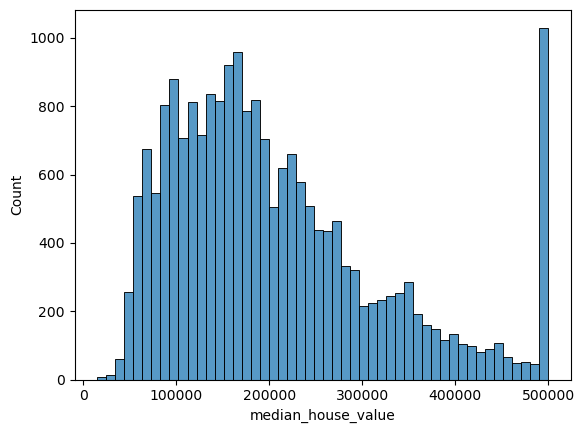

In [3]:
# create a histogram plot of a variable median_house_value
sns.histplot(data.median_house_value, bins=50)

## Preparing the dataset

In [4]:
# keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
f_data = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [7]:
# List of columns to keep
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
f_data = f_data[selected_columns]

In [8]:
f_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## There's one feature with missing values

In [131]:
# total_bedrooms has some missing features
f_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## median for variable 'population'

In [48]:
median_population = f_data['population'].median()
median_population

1195.0

## Shuffle the initial dataset, use seed 42

In [49]:
index= np.arange(len(f_data))
np.random.seed(42)
np.random.shuffle(index)
f_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Split data in train/val/test sets, with 60%/20%/20% distribution.

In [10]:
all_data = len(f_data)
val_size = int(all_data * 0.2)
test_size = int(all_data * 0.2)
train_size = all_data - val_size - test_size

train_data = f_data.iloc[:train_size]
val_data = f_data.iloc[train_size:(train_size + val_size)]
test_data = f_data.iloc[(train_size + val_size):]

In [11]:
# Apply log transformation to 'median_house_value' using np.log1p()
y_train = np.log1p(train_data.median_house_value.values) 
y_val = np.log1p(val_data.median_house_value.values)
y_test = np.log1p(test_data.median_house_value.values)

In [12]:
del train_data['median_house_value']
del val_data['median_house_value']
del test_data['median_house_value']

In [13]:
# Missing values 
test_data.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        33
population             0
households             0
median_income          0
dtype: int64

## Dealing with missing values for the column

In [14]:
# Option 1: Fill missing values with 0
train_data_fill_zero = train_data.fillna(0)
val_data_fill_zero = val_data.fillna(0)
test_data_fill_zero = test_data.fillna(0)

In [15]:
# Calculate the mean from the training data
mean_total_bedrooms = train_data['total_bedrooms'].mean()

# Option 2: Fill missing values with the mean (training set only)
train_data_fill_mean = train_data.fillna({'total_bedrooms': mean_total_bedrooms})
val_data_fill_mean = val_data.fillna({'total_bedrooms': mean_total_bedrooms})
test_data_fill_mean = test_data.fillna({'total_bedrooms': mean_total_bedrooms})

## Training a linear regression model

In [16]:
#  train a linear regression model without regularization
def train_linear_regression(X, y):
    # Add a column of ones (bias term) to the feature matrix X
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Compute X^T * X (the dot product of the transpose of X and X)
    XTX = X.T.dot(X)

    # Compute the inverse of XTX
    XTX_inv = np.linalg.inv(XTX)

    # Compute the weight coefficients w
    w = XTX_inv.dot(X.T).dot(y)

    # Return the bias (intercept) w[0] and the remaining weights w[1:]
    return w[0], w[1:]

In [17]:
# Training with 0-filled missing values
bias_fill_zero, weights_fill_zero = train_linear_regression(train_data_fill_zero, y_train)
print("Bias (Intercept) for 0-filled scenario:", bias_fill_zero)
print("Weights for 0-filled scenario:", weights_fill_zero)

print('\n')

# Training with mean-filled missing values (training set only)
bias_fill_mean, weights_fill_mean = train_linear_regression(train_data_fill_mean, y_train)
print("Bias (Intercept) for Mean-filled scenario:", bias_fill_mean)
print("Weights for Mean-filled scenario:", weights_fill_mean)


Bias (Intercept) for 0-filled scenario: -6.044513134855449
Weights for 0-filled scenario: [-2.75843659e-01 -2.27363003e-01  1.83534913e-03 -2.55323154e-05
  3.16788061e-04 -2.16429131e-04  5.26427661e-04  1.68083345e-01]


Bias (Intercept) for Mean-filled scenario: -6.270379375382983
Weights for Mean-filled scenario: [-2.78165300e-01 -2.29862004e-01  1.89128098e-03 -2.90833462e-05
  5.06747168e-04 -2.12036116e-04  3.30647030e-04  1.69542094e-01]


In [18]:
# Make predictions for both scenarios on the validation data
y_val_pred_fill_zero = bias_fill_zero + np.dot(val_data_fill_zero.values, weights_fill_zero)
y_val_pred_fill_mean = bias_fill_mean + np.dot(val_data_fill_mean.values, weights_fill_mean)

y_val_pred_fill_zero

array([12.47168261, 12.32937584, 12.19237962, ..., 11.45142003,
       11.56182744, 11.45988803])

## Histogram fro the train and our prediction value filled with 0

<AxesSubplot: ylabel='Count'>

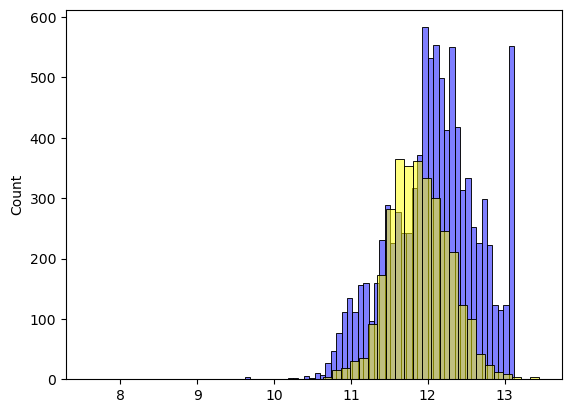

In [19]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred_fill_zero, color='yellow', alpha=0.5, bins=50)

## Histogram fro the train and our prediction value filled with mean of the value

<AxesSubplot: ylabel='Count'>

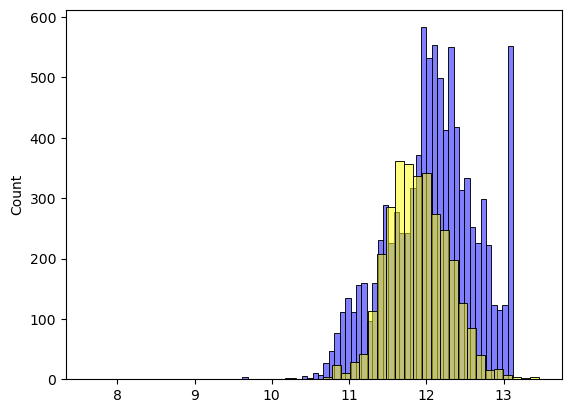

In [20]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred_fill_mean, color='yellow', alpha=0.5, bins=50)

In [21]:
# custom RMSE function 
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
# Using the validation dataset to evaluate the models
rmse_fill_zero_custom = rmse(y_val, y_val_pred_fill_zero)
rmse_fill_mean_custom = rmse(y_val, y_val_pred_fill_mean)
print("rmse_fill_zero_custom = {}".format(rmse_fill_zero_custom))
print("rmse_fill_mean_custom = {}".format(rmse_fill_mean_custom))

rmse_fill_zero_custom = 0.35415219292357436
rmse_fill_mean_custom = 0.35716002290015847


In [23]:
# Round the RMSE scores to 2 decimal digits 
rmse_fill_zero_rounded = round(rmse_fill_zero_custom, 2)
rmse_fill_mean_rounded = round(rmse_fill_mean_custom, 2)

In [24]:
print("rmse_fill_zero_rounded = {}".format(rmse_fill_zero_rounded))
print("rmse_fill_mean_rounded = {}".format(rmse_fill_mean_rounded))

rmse_fill_zero_rounded = 0.35
rmse_fill_mean_rounded = 0.36


In [69]:
# Compare the RMSE scores and determine which option is better
if rmse_fill_zero_rounded < rmse_fill_mean_rounded:
    print("RMSE for 0-filled scenario is better:", rmse_fill_zero_rounded)
else:
   print("RMSE for Mean-filled scenario is better:", rmse_fill_mean_rounded)

RMSE for 0-filled scenario is better: 0.35


In [142]:
## Regularized linear regression.
##  the model is performing similarly to the unregularized case

In [66]:
# list of different values of r
reg_values=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

best_rmse = float('inf')
best_r = None

# Dictionary to store RMSE values for each r
rmse_values = {}

# Define a simple linear regression function with L2 regularization
def simple_linear_regression(X, y, r):
    XTX = X.T.dot(X)
    XTX_reg = XTX + r * np.eye(XTX.shape[0])  # Add regularization term to the diagonal
    XTX_inv = np.linalg.inv(XTX_reg)
    w = XTX_inv.dot(X.T).dot(y)
    return w

# Iterate through different values of r
for r in reg_values:
    # Train a simple linear regression model with L2 regularization
    w = simple_linear_regression(train_data_fill_zero, y_train, r)
    
    # Make predictions on the validation dataset
    y_val_pred = val_data_fill_zero.dot(w)
    
    # Calculate RMSE for the current r value
    rmse_value = np.sqrt(((y_val - y_val_pred) ** 2).mean())
    
    # Round RMSE to 2 decimal digits
    rmse_rounded = round(rmse, 2)

    # Store the RMSE value 
    rmse_values[r] = rmse_rounded
    
    # Check if this r value results in a lower RMSE
    if rmse_rounded < best_rmse:
        best_rmse = rmse_rounded
        best_r = r

# Print the RMSE values for each r
for r, rmse in rmse_values.items():
    print(f"RMSE for r={r}: {rmse}")

# Print the best r value and corresponding RMSE
print("Best r value:", best_r)
print("Best RMSE:", best_rmse)
    

RMSE for r=0: 0.34
RMSE for r=1e-06: 0.34
RMSE for r=0.0001: 0.34
RMSE for r=0.001: 0.34
RMSE for r=0.01: 0.34
RMSE for r=0.1: 0.34
RMSE for r=1: 0.34
RMSE for r=5: 0.34
RMSE for r=10: 0.34
Best r value: 0
Best RMSE: 0.34


In [67]:
# custom RMSE function 
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [71]:
# Define the seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []  # To store RMSE scores for each seed

# Loop through each seed
for seed in seed_values:
    # Set the random seed for reproducibility
    np.random.seed(seed)
    
    # Shuffle the data
    idx = np.arange(len(f_data))
    np.random.shuffle(idx)
    shuffled_data = f_data.iloc[idx]
    
    # Split the data into train, validation, and test sets (60%/20%/20%)
    all_data = len(shuffled_data)
    val_size = int(all_data * 0.2)
    test_size = int(all_data * 0.2)
    train_size = all_data - val_size - test_size
    
    train_data = shuffled_data.iloc[:train_size]
    val_data = shuffled_data.iloc[train_size:(train_size + val_size)]
# Fill missing values with 0
    train_data_fill_zero = train_data.fillna(0)
    val_data_fill_zero = val_data.fillna(0)

    X_train_fill_zero = train_data_fill_zero.drop('median_house_value', axis=1)
    y_train_fill_zero = np.log1p(train_data_fill_zero['median_house_value'])
    X_val_fill_zero = val_data_fill_zero.drop('median_house_value', axis=1)
    y_val_fill_zero = np.log1p(val_data_fill_zero['median_house_value'])

    bias_fill_zero, weights_fill_zero = train_linear_regression(X_train_fill_zero, y_train_fill_zero)
    # Predict on validation data
    y_val_pred_fill_zero = bias_fill_zero + np.dot(X_val_fill_zero.values, weights_fill_zero)
    # Calculate RMSE for this seed and store it
    rmse_score = rmse(y_val_fill_zero, y_val_pred_fill_zero)
    rmse_scores.append(rmse_score)

# Calculate the standard deviation of RMSE scores
std_deviation = np.std(rmse_scores)

# Round the result to 3 decimal digits
std_deviation_rounded = round(std_deviation, 3)

# Print the standard deviation
print("Standard Deviation of RMSE Scores:", std_deviation_rounded)

Standard Deviation of RMSE Scores: 0.005


## using int '9' as seed

In [89]:
# Set the random seed for reproducibility
np.random.seed(9)

# Shuffle the initial dataset with seed 9
idx = np.arange(len(f_data))
np.random.shuffle(idx)

# Split the data into train, validation, and test sets (60%/20%/20%)
all_data = len(f_data)
val_size = int(all_data * 0.2)
test_size = int(all_data * 0.2)
train_size = all_data - val_size - test_size

train_data = f_data.iloc[:train_size]
val_data = f_data.iloc[train_size:(train_size + val_size)]
test_data = f_data.iloc[(train_size + val_size):]

# Combine train and validation datasets
train_val_data = pd.concat([train_data, val_data])

# Fill missing values with 0
train_val_data_fill_zero = train_val_data.fillna(0)
test_data_fill_zero = test_data.fillna(0)

# Extract features and target variables for train_val_data and test_data
X_train_val_fill_zero = train_val_data_fill_zero.drop('median_house_value', axis=1)
y_train_val_fill_zero = np.log1p(train_val_data_fill_zero['median_house_value'])
X_test_fill_zero = test_data_fill_zero.drop('median_house_value', axis=1)
y_test_fill_zero = np.log1p(test_data_fill_zero['median_house_value'])

# Train a linear regression model with regularization (r=0.001) on the combined dataset
r_value = 0.001
weights_reg = simple_linear_regression(X_train_val_fill_zero, y_train_val_fill_zero, r_value)

# Predict on test data
y_test_pred_reg = X_test_fill_zero.dot(weights_reg)

# Calculate RMSE for the model with regularization (r=0.001) on the test data
rmse_reg = rmse(y_test_fill_zero, y_test_pred_reg)

# Print the RMSE
print("RMSE with regularization (r=0.001) on the test data:", rmse_reg)


RMSE with regularization (r=0.001) on the test data: 0.33042392020916683
